In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Block splitting

(567, 567, 3)


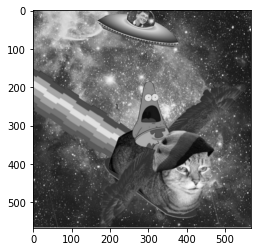

In [2]:
img = plt.imread("img.png")
plt.imshow(img, cmap='gray')
print(img.shape)

In [3]:
dummy = np.zeros((16, 16))
dummy[:8, :8] = 1
dummy[:8, 8:16] = 2
dummy[8:16, :8] = 3
dummy[8:16, 8:16] = 4
print(dummy)

[[1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.]]


In [53]:
dummy = np.zeros((16, 7))
count = 0
for i in range(0, dummy.shape[0], 8):
    for j in range(0, dummy.shape[1], 8):
        dummy[i:i+8, j:j+8] = count
        count += 1

In [4]:
def sliding_window(img):
    """
        8x8 sliding window over image

        TODO: yield macro block later ?
    """
    for i in range(0, img.shape[0], 8):
        for j in range(0, img.shape[1], 8):
            print(img[i:i+8, j:j+8].shape)
            print(img[i:i+8, j:j+8])

In [192]:
print((3 // 2), (3 // 2) + 1)
print((5 // 2), (5 // 2) + 1)

1 2
2 3


In [193]:
print((11 // 2), (11 // 2) + 1)

5 6


In [ ]:
# 3 -> 2, 1
# 5 -> 2, 3

In [237]:
def padding(img, mode="black"):
    print(f"before: {img.shape}")

    # Round up to nearest multiple of 8
    w = (img.shape[0] + 7) & (-8)
    h = (img.shape[1] + 7) & (-8)

    # Smarter padding -> Pad with image center in middle.
    delta_w = w - img.shape[0]
    delta_h = h - img.shape[1]
    
    ax1_top, ax1_bot, ax2_left, ax2_right = 0, 0, 0, 0

    if delta_w != 0:
        ax1_top, ax1_bot = (delta_w//2) , (delta_w//2)
        if delta_w % 2 == 1:    
            ax1_bot = (delta_w//2) + 1
    
    if delta_h != 0:
        ax2_left, ax2_right = (delta_h//2) , (delta_h//2)
        if delta_h % 2 == 1:
            ax2_right = (delta_h//2) + 1

    if mode == "black":
        img = np.pad(img, [(ax1_top , ax1_bot), (ax2_left, ax2_right)], 'constant')
    elif mode == "replicate":
        img = np.pad(img, [(ax1_top, ax1_bot), (ax2_left, ax2_right)], 'symmetric')
    else:
        raise ValueError("This ode doesn't exist")

    print(f"after: {img.shape}")
    return img

In [239]:
dummy = np.ones((0, 0))
print(padding(dummy, mode="black"))

before: (0, 0)
after: (0, 0)
[]


In [136]:
a = np.array([[ 1.,  1.,  1.,  1.,  1.],
...               [ 1.,  1.,  1.,  1.,  1.],
...               [ 1.,  1.,  1.,  1.,  1.]])
print(a.shape)
a

(3, 5)


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [142]:
np.pad(a, [(1, ), (0, )], mode='constant')

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [100]:
np.pad(a, (1, 1), mode='constant')

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [157]:
def tile(matrix, nrows = 8, ncols = 8):
    tile_formation_along_lines = matrix.reshape(matrix.shape[1] // nrows, nrows, -1, ncols)
    tile_formation_along_square = tile_formation_along_lines.swapaxes(1, 2)

    # Put all tiles on first indice, instead of matrix of matrix
    return tile_formation_along_square.reshape(-1, nrows, ncols)

def pad_image(gray_image, to_add_row, to_add_col):
    return np.pad(gray_image, ((0, to_add_col), (0, to_add_row)), mode='symmetric')

def tile_image(image, tile_shape = (8, 8)):
    image_width = image.shape[-1]
    image_height = image.shape[-2]
    to_add_row = 0
    to_add_col = 0

    if image_width % tile_shape[1] != 0:
        to_add_row = tile_shape[1] - image_width % tile_shape[1]
    if image_height % tile_shape[0] != 0:
        to_add_col = tile_shape[0] - image_height % tile_shape[0]

    print(to_add_row)
    print(to_add_col)

    tiled_padded_gray_image = pad_image(image, to_add_row, to_add_col)
    print(tiled_padded_gray_image.shape)
    return tile(tiled_padded_gray_image, *tile_shape)

print(dummy.shape)
tile_image(dummy).shape

(5, 11)
5
3
(8, 16)


(2, 8, 8)

# Step 2: Discrete cosine transform

# Step 3: Quantization

# Step 4: Zigzag ordering + Entropy coding